In [37]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_file=pd.read_csv(city_data_to_load)
ride_file=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
ride_table = pd.merge(ride_file, city_file, on="city")
# Display the data table for preview
ride_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

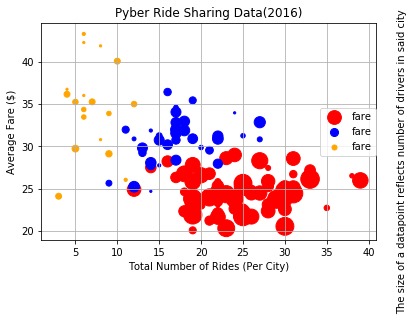

In [50]:
City_comp = ride_table.groupby(["city","type"])
City_Fare = ride_table.groupby("type")
Driver_count=ride_table.groupby("type")
City_comp[["type","fare","ride_id","driver_count"]].mean()
fare_total = City_comp[["fare"]].mean()
ride_id = City_comp[["ride_id"]].count()
driver_count=City_comp[["driver_count"]].mean()
fare_total["ride_id"] = ride_id
fare_mean=fare_total
fare_mean["driver_count"]=driver_count
fare_mean.head()
urban_data = fare_mean.query("type == 'Urban'")
suburban_data = fare_mean.query("type == 'Suburban'")
Rural_data = fare_mean.query("type == 'Rural'")
plt.scatter(urban_data.ride_id, urban_data.fare, facecolor="red", s=5*urban_data.driver_count)
plt.scatter(suburban_data.ride_id, suburban_data.fare, facecolor="blue", s=5*suburban_data.driver_count)
plt.scatter(Rural_data.ride_id, Rural_data.fare, facecolor="orange", s=5*Rural_data.driver_count)
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend
plt.grid()
plt.figtext(.95, .9, "The size of a datapoint reflects number of drivers in said city", rotation='vertical')
plt.legend(loc='right', borderaxespad=0)
plt.savefig("RideSharingData.png")

In [39]:
# Show plot
plt.show()

## Total Fares by City Type

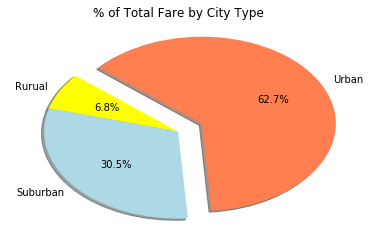

<Figure size 432x288 with 0 Axes>

In [40]:
Ride_count = ride_table.groupby("type")
fare_total = Ride_count[["fare"]].sum()
labels = ["Rurual", "Suburban", "Urban"]
colors = ["yellow", "lightblue", "coral"]
explode=(0,0,0.2)
# Build Pie Chart
plt.pie(fare_total, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fare by City Type")
plt.show()
plt.savefig("TotalFares.png")

In [41]:
# Show Figure
plt.show()

## Total Rides by City Type

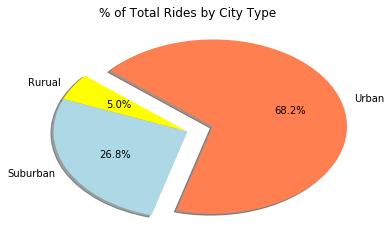

In [42]:
Ride_count = ride_table.groupby("type")
Ride_ID = Ride_count[["ride_id"]].sum()
labels = ["Rurual", "Suburban", "Urban"]
colors = ["yellow", "lightblue", "coral"]
explode=(0,0,0.2)
# Build Pie Chart
plt.pie(Ride_ID, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show
plt.savefig("TotalRides.png")

In [43]:
# Show Figure
plt.show()

## Total Drivers by City Type

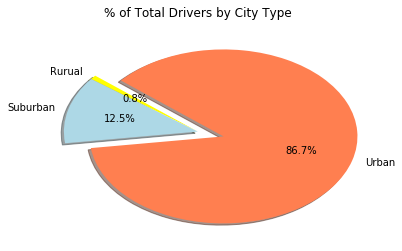

<Figure size 432x288 with 0 Axes>

In [44]:
Ride_count = ride_table.groupby("type")
Driver_count = Ride_count[["driver_count"]].sum()
labels = ["Rurual", "Suburban", "Urban"]
colors = ["yellow", "lightblue", "coral"]
# Build Pie Charts
plt.pie(Driver_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
(plt.title("% of Total Drivers by City Type"))
plt.show()
plt.savefig("TotalDrivers.png")

In [45]:
# Show Figure
plt.show()